## Downtime signal filter
Find the mean audio values during downtime and subtract from uptime, then observe changes.

In [41]:
import glob
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pycaret'

### Data Prep

In [9]:
fn_list = glob.glob('AudioDataArchive/08-09-23/*.parquet')
print("# files: ",len(fn_list))
df = pd.DataFrame()
for file in fn_list:
    tdf = pd.read_parquet(file)
    if df.empty:
        df = tdf
    else:
        df = pd.concat([df, tdf])
df.reset_index(drop=True, inplace=True)
df2 = pd.concat([df.loc[:,['timestamp']],df.loc[:].value.apply(json.loads).apply(pd.Series)], axis=1) # Break down into dataframe
df2=(df2-df2.min())/(df2.max()-df2.min()) # Standardization
uptime = df2[df2['ZM6_MillFPM'] > 0]
downtime = df2[df2['ZM6_MillFPM'] <= 0]

# files:  115


### Raw uptime & downtime signals

C:\Users\fj4908.NASDOMAIN\Documents\GitHub\audio-modeling\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Uptime Raw')

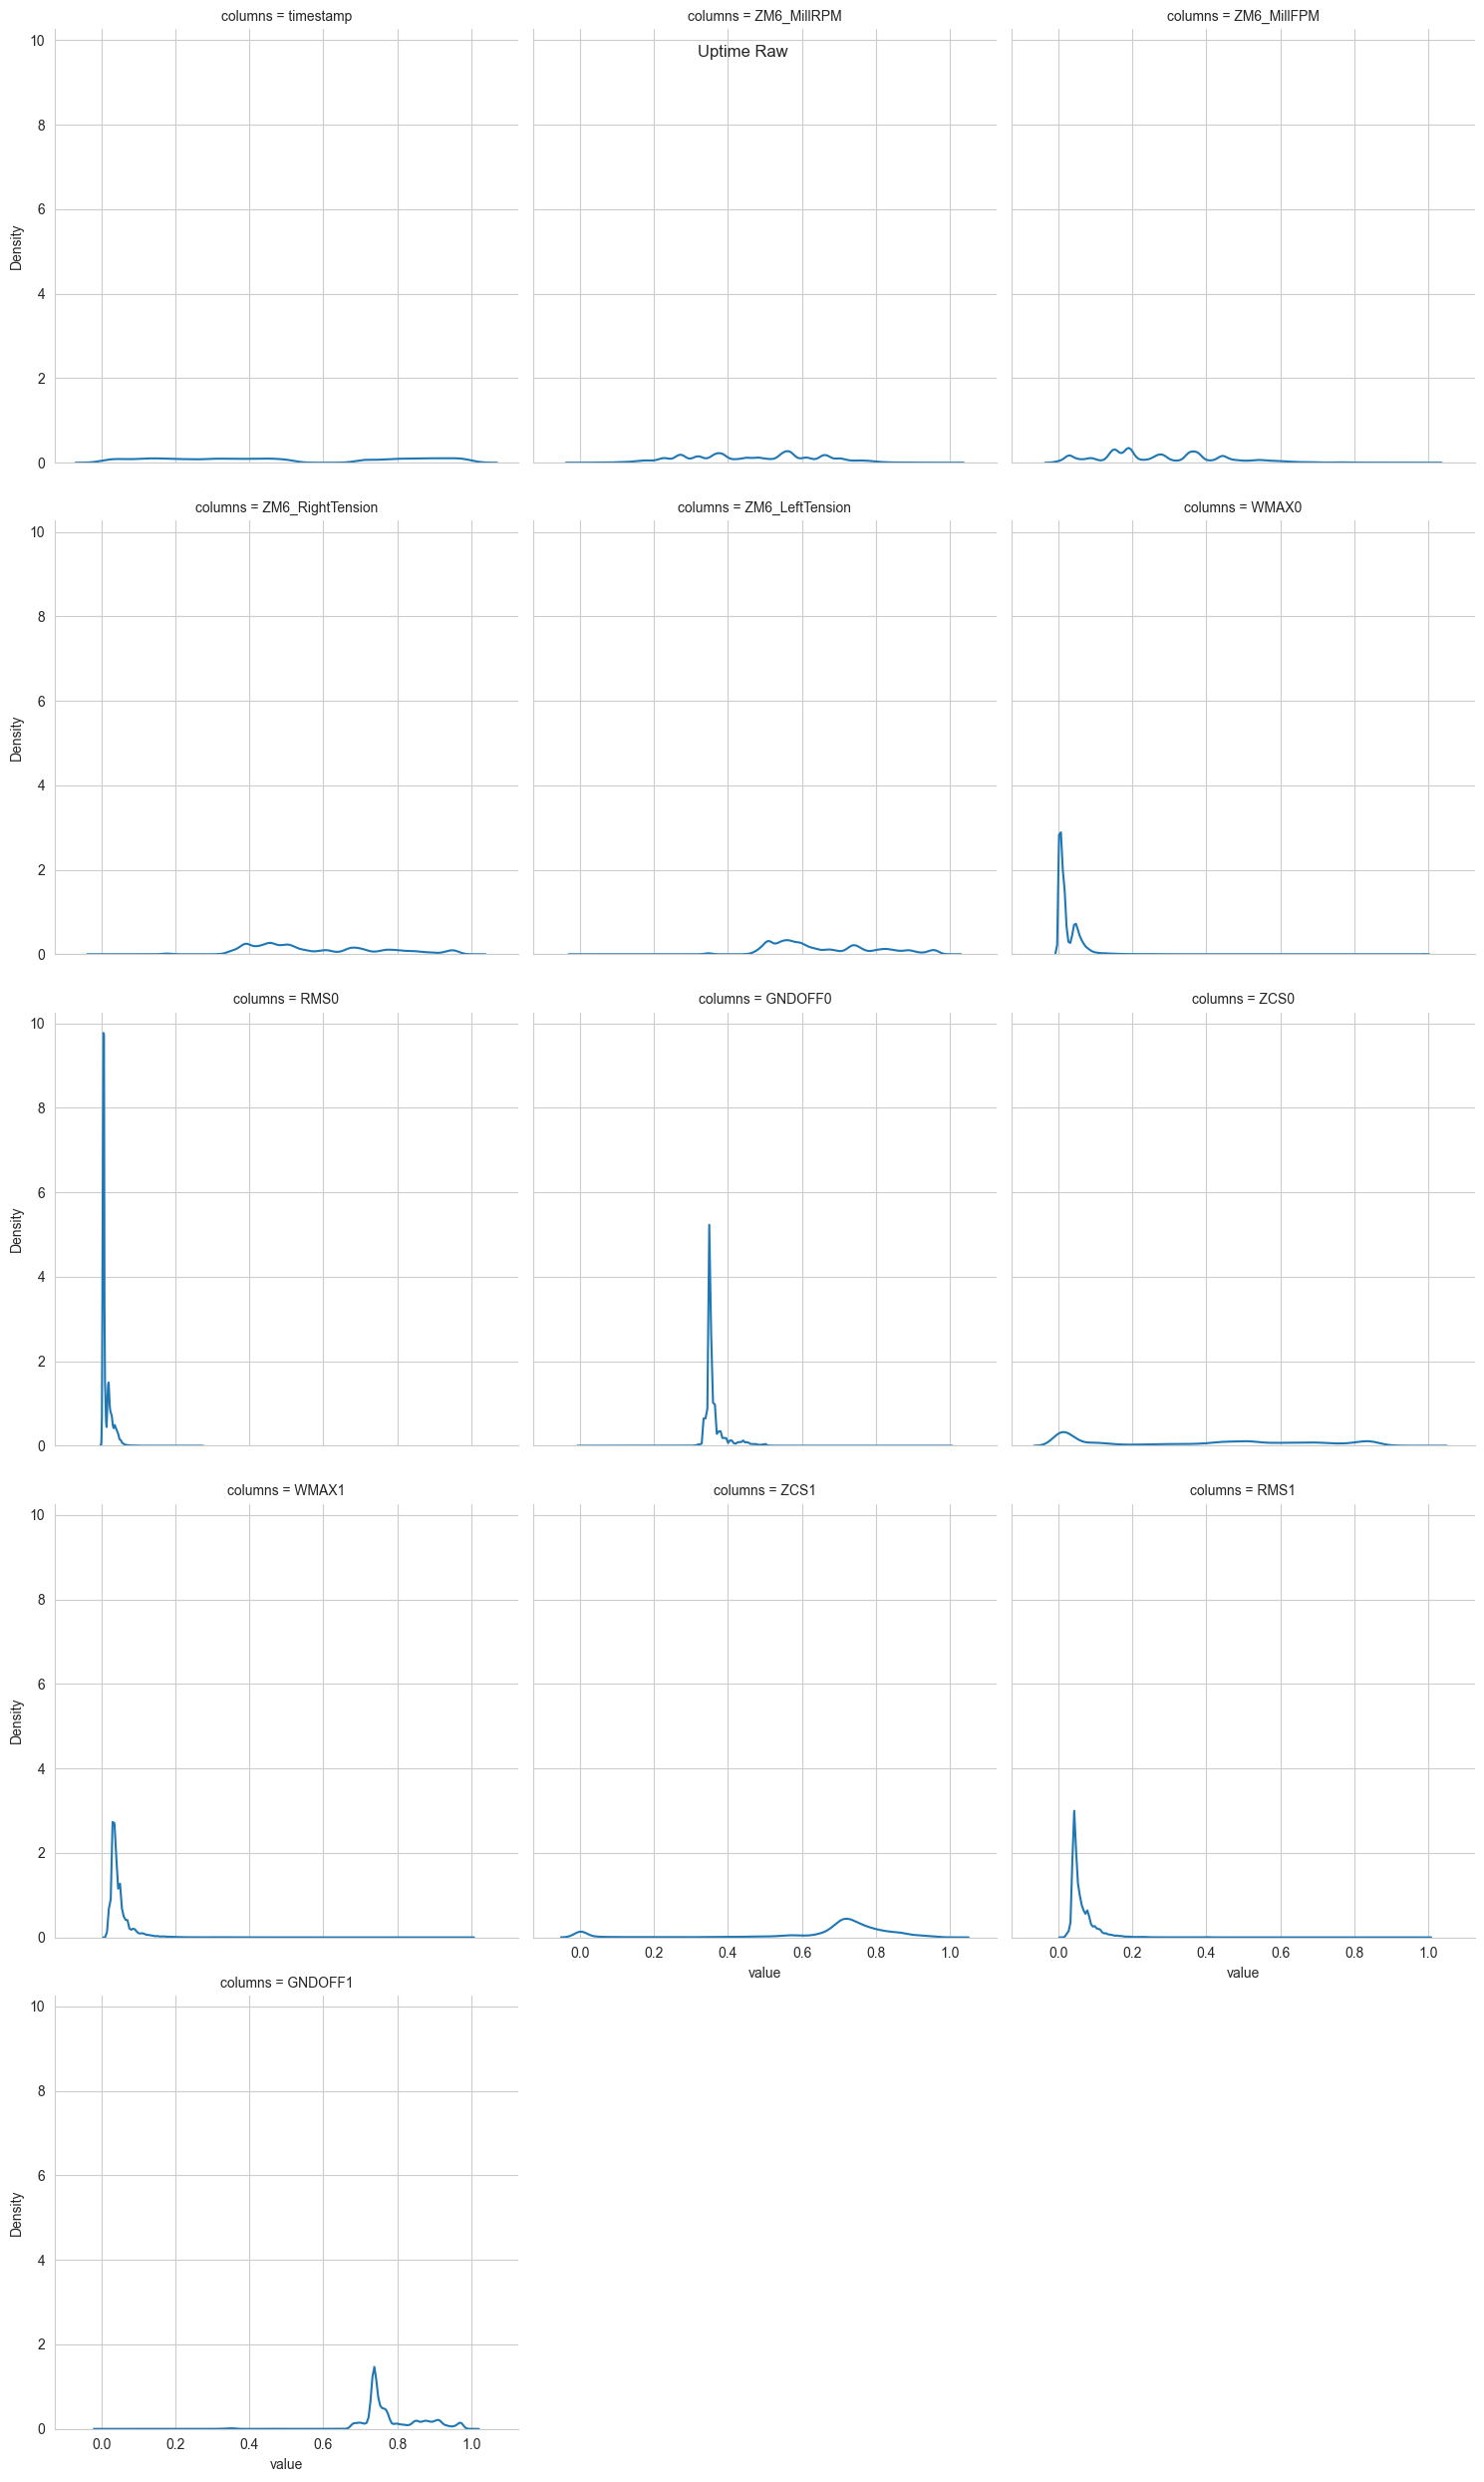

In [10]:
uptime_m = uptime.melt(var_name='columns')
g = sns.displot(data=uptime_m, x='value', col='columns', kind='kde',col_wrap=3)
g.fig.suptitle('Uptime Raw')

C:\Users\fj4908.NASDOMAIN\AppData\Local\Temp\ipykernel_10164\1604278830.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(data=downtime_m, x='value', col='columns', kind='kde',col_wrap=3)
C:\Users\fj4908.NASDOMAIN\Documents\GitHub\audio-modeling\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


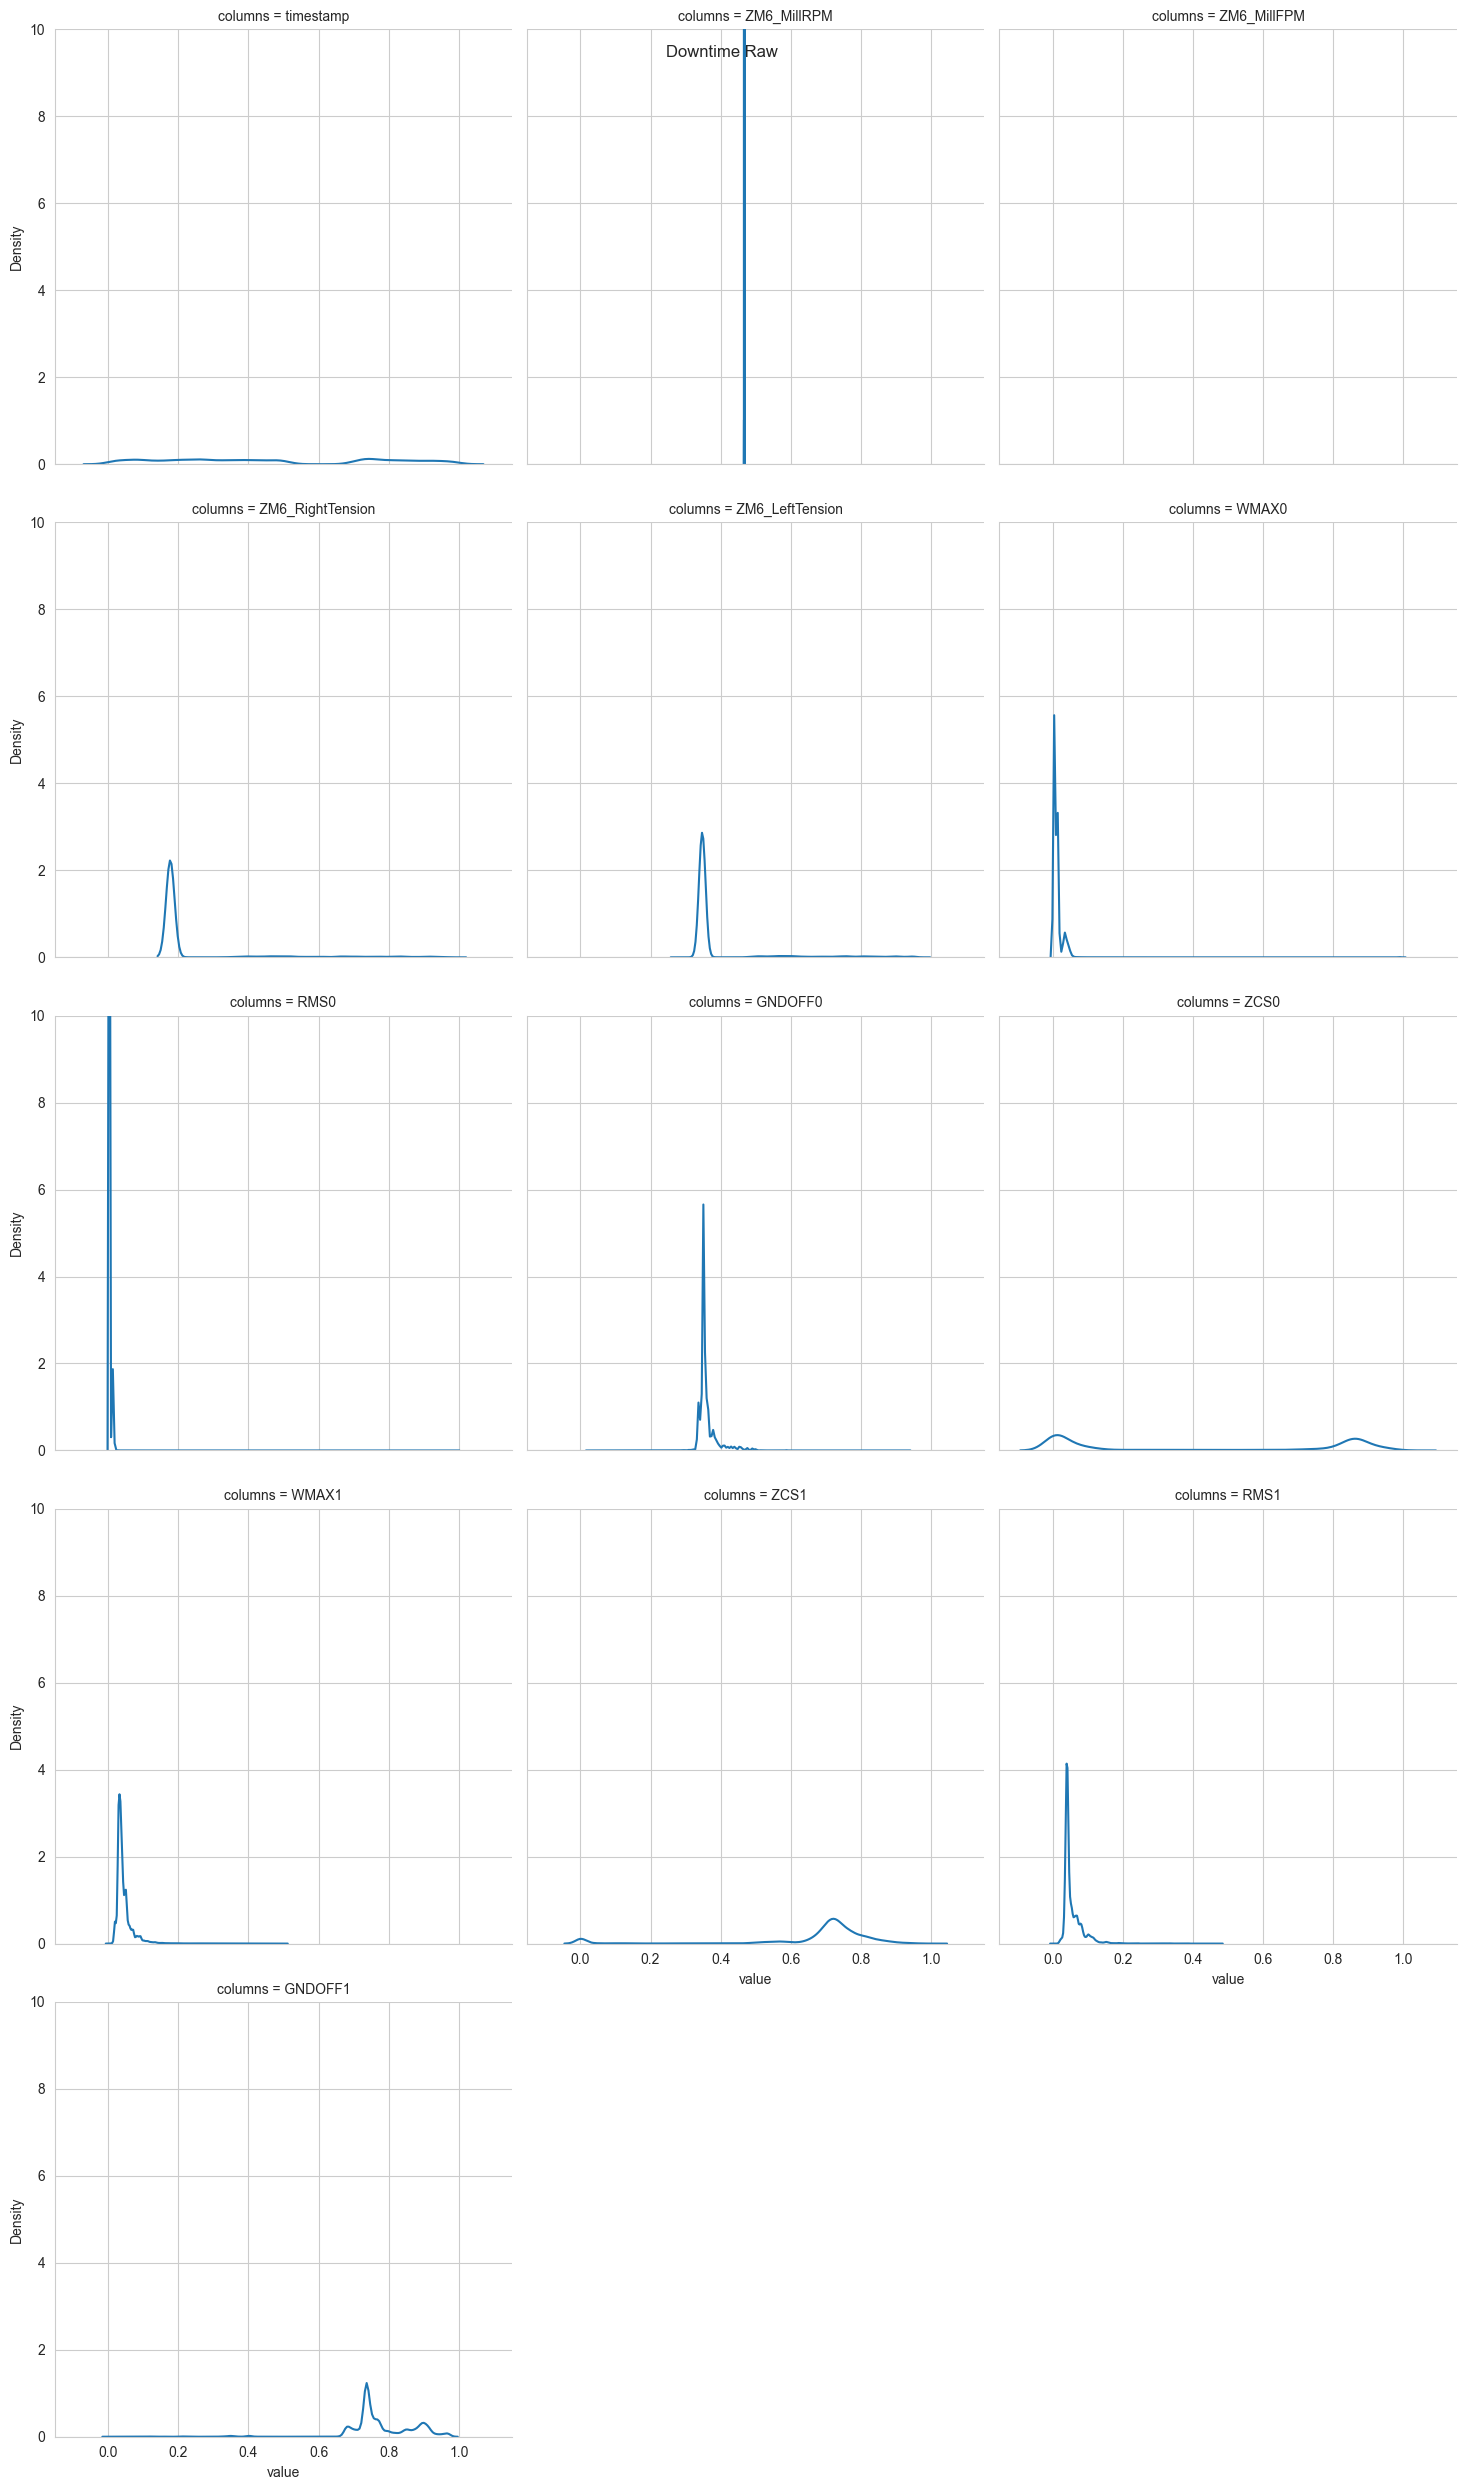

In [12]:
downtime_m = downtime.melt(var_name='columns')
g = sns.displot(data=downtime_m, x='value', col='columns', kind='kde',col_wrap=3)
g.fig.suptitle('Downtime Raw')
g.set(ylim=(0, 10))

### Uptime with background noise filtered out

C:\Users\fj4908.NASDOMAIN\Documents\GitHub\audio-modeling\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Background filtered uptime')

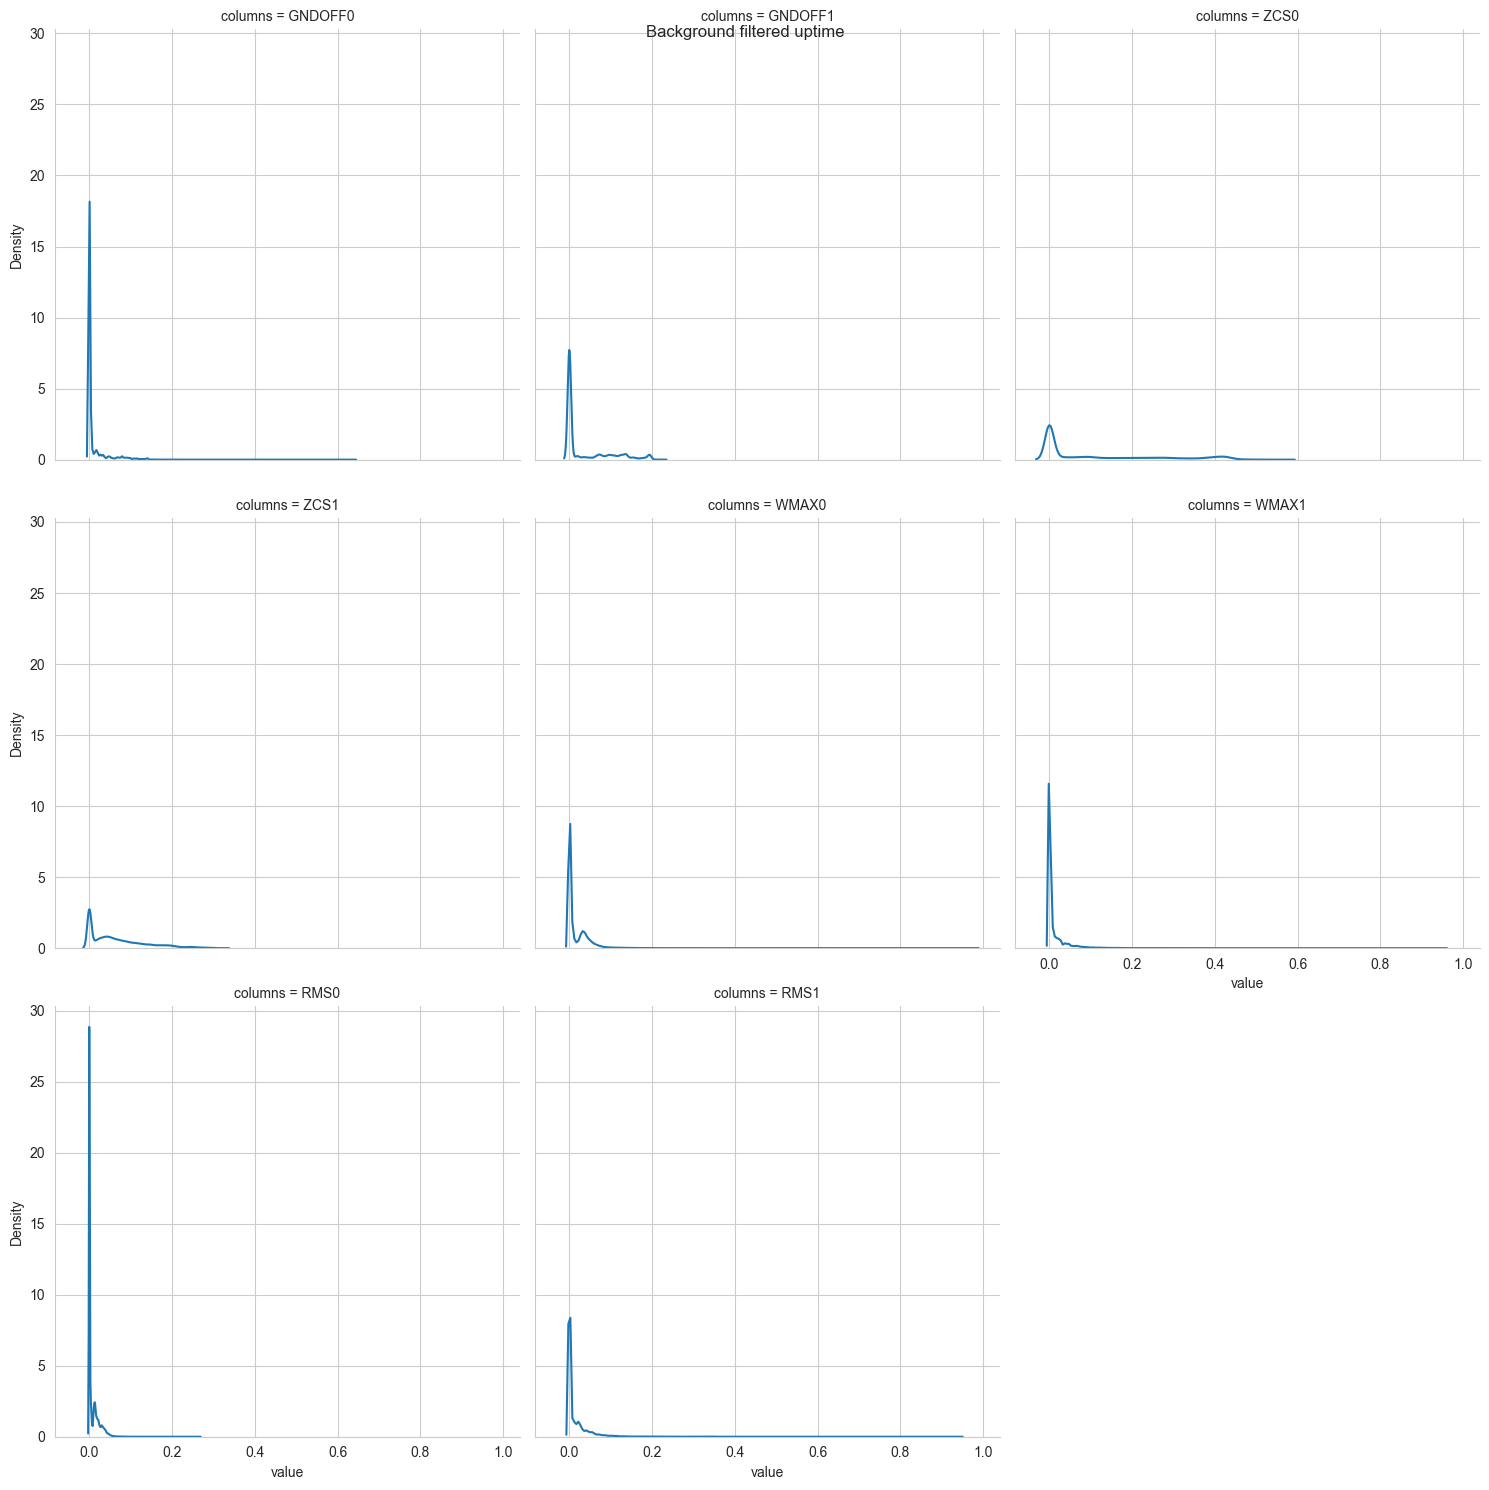

In [22]:
uptime = df2[df2['ZM6_MillFPM'] > 0]
uptime_only = uptime[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']] - downtime[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']].mean()
uptime_only[uptime_only < 0] = 0
uptime_m = uptime_only.melt(var_name='columns')
g = sns.displot(data=uptime_m, x='value', col='columns', kind='kde',col_wrap=3)
g.fig.suptitle('Background filtered uptime')

In [37]:
uptime = df2[df2['ZM6_MillFPM'] > 0]
uptime

,timestamp,ZM6_MillRPM,ZM6_MillFPM,ZM6_RightTension,ZM6_LeftTension,WMAX0,RMS0,GNDOFF0,ZCS0,WMAX1,ZCS1,RMS1,GNDOFF1
0,0.000000e+00,0.676853,0.394490,0.507200,0.594617,0.060182,0.036079,0.349086,0.660221,0.033531,0.489302,0.052213,0.676281
1,9.631123e-07,0.677004,0.394613,0.507686,0.594779,0.062323,0.036266,0.350081,0.661325,0.030906,0.492262,0.051946,0.676281
2,1.929404e-06,0.676929,0.394618,0.507427,0.594375,0.063310,0.036244,0.350966,0.662898,0.053295,0.496105,0.052722,0.676428
3,2.895261e-06,0.676778,0.394383,0.507308,0.594623,0.058690,0.036431,0.350966,0.656270,0.033531,0.474982,0.054104,0.676428
4,3.855752e-06,0.676853,0.394476,0.507620,0.594826,0.066720,0.036859,0.351040,0.661962,0.029681,0.480833,0.054564,0.676428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857010,9.999961e-01,0.225710,0.450053,0.466943,0.577812,0.040730,0.017780,0.349749,0.742498,0.024379,0.001905,0.077205,0.736750
857011,9.999971e-01,0.225861,0.449819,0.467416,0.577750,0.046533,0.017546,0.350597,0.747084,0.019130,0.001769,0.077083,0.736750
857012,9.999981e-01,0.225811,0.449843,0.467304,0.577664,0.041427,0.017612,0.350855,0.748938,0.021755,0.002075,0.076793,0.736750
857013,9.999990e-01,0.225785,0.449877,0.467471,0.577963,0.044824,0.017362,0.350265,0.759983,0.024379,0.001973,0.077665,0.736750


In [38]:
uptime_only = uptime[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']] - downtime[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']].mean()
uptime_only[uptime_only < 0] = 0
#uptime_only[uptime_only['RMS1'] > 0]
uptime_only

,GNDOFF0,GNDOFF1,ZCS0,ZCS1,WMAX0,WMAX1,RMS0,RMS1
0,0.0,0.0,0.236263,0.0,0.047552,0.000000,0.030032,0.000000
1,0.0,0.0,0.237367,0.0,0.049693,0.000000,0.030219,0.000000
2,0.0,0.0,0.238940,0.0,0.050681,0.007736,0.030197,0.000000
3,0.0,0.0,0.232313,0.0,0.046060,0.000000,0.030384,0.000000
4,0.0,0.0,0.238004,0.0,0.054090,0.000000,0.030813,0.000000
...,...,...,...,...,...,...,...,...
857010,0.0,0.0,0.318540,0.0,0.028100,0.000000,0.011733,0.020746
857011,0.0,0.0,0.323127,0.0,0.033903,0.000000,0.011499,0.020625
857012,0.0,0.0,0.324980,0.0,0.028797,0.000000,0.011565,0.020334
857013,0.0,0.0,0.336025,0.0,0.032194,0.000000,0.011315,0.021207


In [40]:
uptime[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']]= uptime_only[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']]
uptime

C:\Users\fj4908.NASDOMAIN\AppData\Local\Temp\ipykernel_10164\1725456405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uptime[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']]= uptime_only[['GNDOFF0','GNDOFF1','ZCS0','ZCS1','WMAX0','WMAX1','RMS0','RMS1']]


,timestamp,ZM6_MillRPM,ZM6_MillFPM,ZM6_RightTension,ZM6_LeftTension,WMAX0,RMS0,GNDOFF0,ZCS0,WMAX1,ZCS1,RMS1,GNDOFF1
0,0.000000e+00,0.676853,0.394490,0.507200,0.594617,0.047552,0.030032,0.0,0.236263,0.000000,0.0,0.000000,0.0
1,9.631123e-07,0.677004,0.394613,0.507686,0.594779,0.049693,0.030219,0.0,0.237367,0.000000,0.0,0.000000,0.0
2,1.929404e-06,0.676929,0.394618,0.507427,0.594375,0.050681,0.030197,0.0,0.238940,0.007736,0.0,0.000000,0.0
3,2.895261e-06,0.676778,0.394383,0.507308,0.594623,0.046060,0.030384,0.0,0.232313,0.000000,0.0,0.000000,0.0
4,3.855752e-06,0.676853,0.394476,0.507620,0.594826,0.054090,0.030813,0.0,0.238004,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857010,9.999961e-01,0.225710,0.450053,0.466943,0.577812,0.028100,0.011733,0.0,0.318540,0.000000,0.0,0.020746,0.0
857011,9.999971e-01,0.225861,0.449819,0.467416,0.577750,0.033903,0.011499,0.0,0.323127,0.000000,0.0,0.020625,0.0
857012,9.999981e-01,0.225811,0.449843,0.467304,0.577664,0.028797,0.011565,0.0,0.324980,0.000000,0.0,0.020334,0.0
857013,9.999990e-01,0.225785,0.449877,0.467471,0.577963,0.032194,0.011315,0.0,0.336025,0.000000,0.0,0.021207,0.0


In [42]:
uptime.describe()

,timestamp,ZM6_MillRPM,ZM6_MillFPM,ZM6_RightTension,ZM6_LeftTension,WMAX0,RMS0,GNDOFF0,ZCS0,WMAX1,ZCS1,RMS1,GNDOFF1
count,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000,481927.000000
mean,0.488809,0.467012,0.275481,0.582871,0.659778,0.016662,0.007727,0.009853,0.108773,0.011172,0.066438,0.014299,0.035770
std,0.317664,0.171027,0.163807,0.175454,0.138807,0.035829,0.012613,0.025865,0.147294,0.029388,0.067671,0.032551,0.057771
min,0.000000,0.000000,0.000145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206770,0.324428,0.154936,0.445096,0.549444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423009,0.470520,0.265063,0.523176,0.613826,0.001102,0.000734,0.000000,0.000000,0.000000,0.048507,0.000000,0.000000
75%,0.816194,0.599447,0.376437,0.709770,0.758154,0.029627,0.012788,0.002547,0.210587,0.007166,0.104070,0.017013,0.071359
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.981810,0.266421,0.639307,0.560804,0.954440,0.323533,0.943542,0.222165
